## Análise de dados: Model Fitness

- Data: 12/11/2025
- Caroline Beatriz Scheurich
- Objetivo: Identificar padrões de rotatividade e propor estratégias para reter clientes da academia Model Fitness.

## Etapa 1 - Inicialização e Carregamento dos dados

- Carregando as bibliotecas
- Carregando o banco de dados
- Lendo as informações dos arquivos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram

In [2]:
# Carregando o banco de dados:

df = pd.read_csv('/datasets/gym_churn_us.csv') 

In [3]:
# Visualizando o banco de dados:
display(df)
print(df.info())

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Temos 4000 entradas e 14 colunas, o conjunto de dados inclui os seguintes campos:

- 'Churn' — a rotatividade do mês em questão
- 'gender' — gênero
- 'Near_Location' — se o cliente morar ou trabalhar na vizinhança onde a academia está localizada
- 'Partner' — se o usuário for um funcionário de uma companhia parceira
- Promo_friends — se o cliente originalmente se inscreveu através de uma oferta "traga um amigo"
- 'Phone' — se o usuário fornece o seu número de telefone
- 'age' (idade)
- 'Lifetime' — o tempo (em meses) desde a primeira vez que o cliente veio à academia
- 'Contract_period' — 1 mês, 3 meses, 6 meses, ou um ano
- 'Month_to_end_contract' — os meses remanescentes até que o contrato expira
- 'Group_visits' — se o cliente participa de sessões em grupo
- 'Avg_class_frequency_total' — frequência média de idas por semana por toda a vida do cliente
- 'Avg_class_frequency_current_month' — frequência média de visitas por semana durante o mês corrente
- 'Avg_additional_charges_total' — a quantidade total de dinheiro gasto em outros serviços da academia: café, artigos esportivos, cosméticos, massagem, etc.

## Etapa 2 - Análise Exploratória dos dados (EDA)

In [4]:
# Verificando valores ausentes:
print(df.isna().sum())

gender                               0
Near_Location                        0
Partner                              0
Promo_friends                        0
Phone                                0
Contract_period                      0
Group_visits                         0
Age                                  0
Avg_additional_charges_total         0
Month_to_end_contract                0
Lifetime                             0
Avg_class_frequency_total            0
Avg_class_frequency_current_month    0
Churn                                0
dtype: int64


In [5]:
# Estudando a média de valores e desvio padrão:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
Near_Location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
Partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
Promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
Phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
Contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
Group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
Age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
Avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
Month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000



Informações:
- Gênero equilibrado: 51%
- Maioria mora perto: 84,5%
- Partner: 48,7%
- Promo_friends: 30,8%
- Phone: 90% forneceram
- Duração do contrato: média 4,68 meses
- Group_visits: 41,20%
- Age: média de 29 anos
- Gasto médio de 147,00 mas com grande variação (até 553,00)
- Meses restantes para o fim do contrato: média de 4,32 meses
- Tempo como cliente: média de 3,72 meses
- **Churn: Média de 26,5%**


In [6]:
# Verificar distribuição de target Churn
print("\nDistribuição Churn (contagem):")
display(df['Churn'].value_counts())
print("\nTaxa de churn geral: {:.2f}%".format(df['Churn'].mean() * 100))


Distribuição Churn (contagem):


0    2939
1    1061
Name: Churn, dtype: int64


Taxa de churn geral: 26.52%


In [7]:
# Médias por Churn para variáveis numéricas
display(df.groupby('Churn').mean().T)

Churn,0,1
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899
Month_to_end_contract,5.283089,1.662582


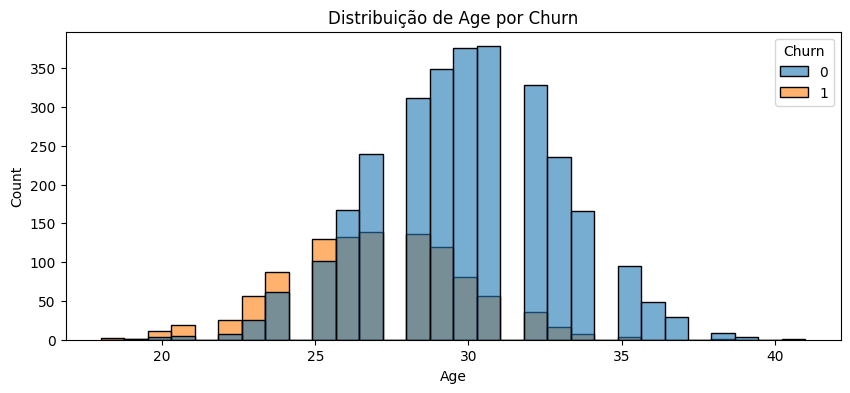

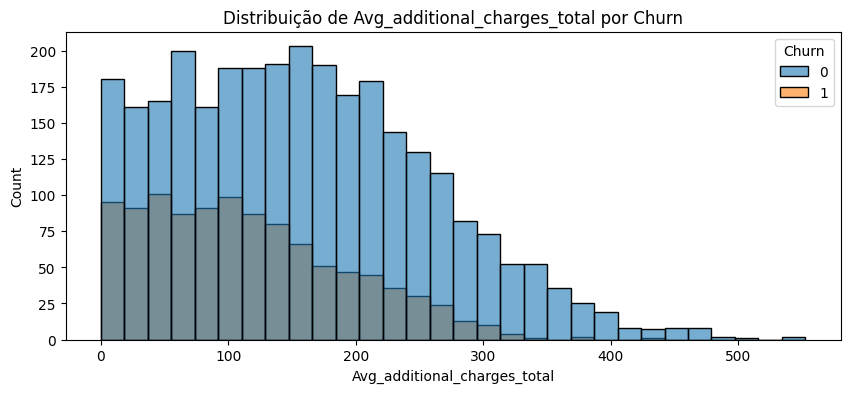

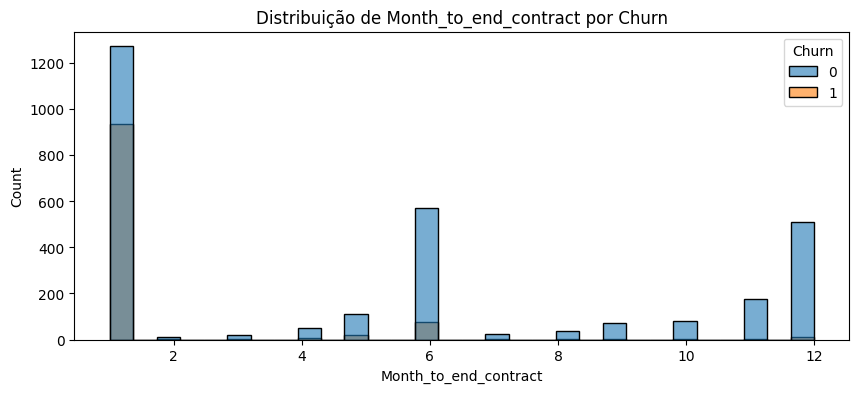

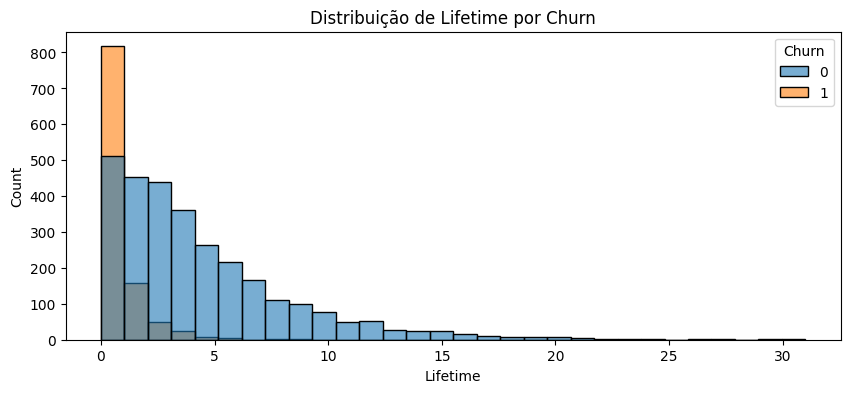

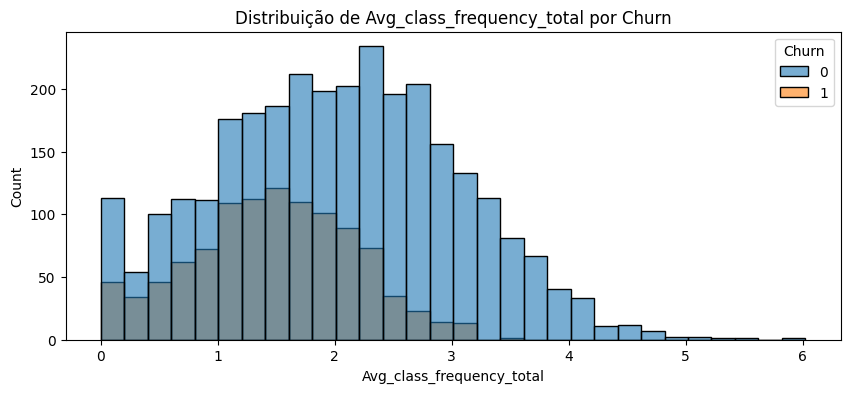

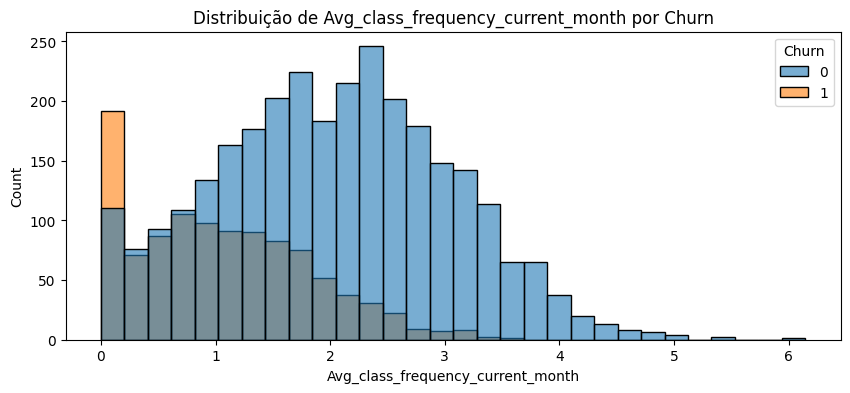

In [8]:
# Histogramas comparativos — exemplo para colunas importantes
cols_to_plot = [c for c in ['Age', 'Avg_additional_charges_total', 'Month_to_end_contract', 'Lifetime', 'Avg_class_frequency_total','Avg_class_frequency_current_month'] if c in df.columns]

for col in cols_to_plot:
    plt.figure(figsize=(10,4))
    sns.histplot(data=df, x=col, hue='Churn', kde=False, bins=30, multiple="layer", alpha=0.6)
    plt.title(f'Distribuição de {col} por Churn')
    plt.show()

Informações:
- Gender: praticamente igual (não influencia).
- Near_Location: quem mora perto tem menos churn.
- Partner: ter parceiro reduz o churn.
- Promo_friends: maior retenção.
- Phone: praticamente igual (não influencia).
- Contract_period: mais longos maior retenção.
- Group_visits: quem participa tem maior retenção.
- Age: clientes jovens saem mais rápido.
- Avg_additional_charges_total: quem gasta mais fica mais tempo.
- Month_to_end_contract: churn aumenta próximo ao fim do contrato.
- Lifetime: cliente que saíram ficaram menos de 1 mês
- Avg_class_frequency_total: frequência de aulas reduz churn.
- Avg_class_frequency_current_month: frequência cai bastante antes do c

Correlações com Churn:


Churn                                1.000000
gender                               0.000708
Phone                               -0.001177
Near_Location                       -0.128098
Partner                             -0.157986
Promo_friends                       -0.162233
Group_visits                        -0.175325
Avg_additional_charges_total        -0.198697
Avg_class_frequency_total           -0.249715
Month_to_end_contract               -0.381393
Contract_period                     -0.389984
Age                                 -0.404735
Avg_class_frequency_current_month   -0.412348
Lifetime                            -0.438220
Name: Churn, dtype: float64

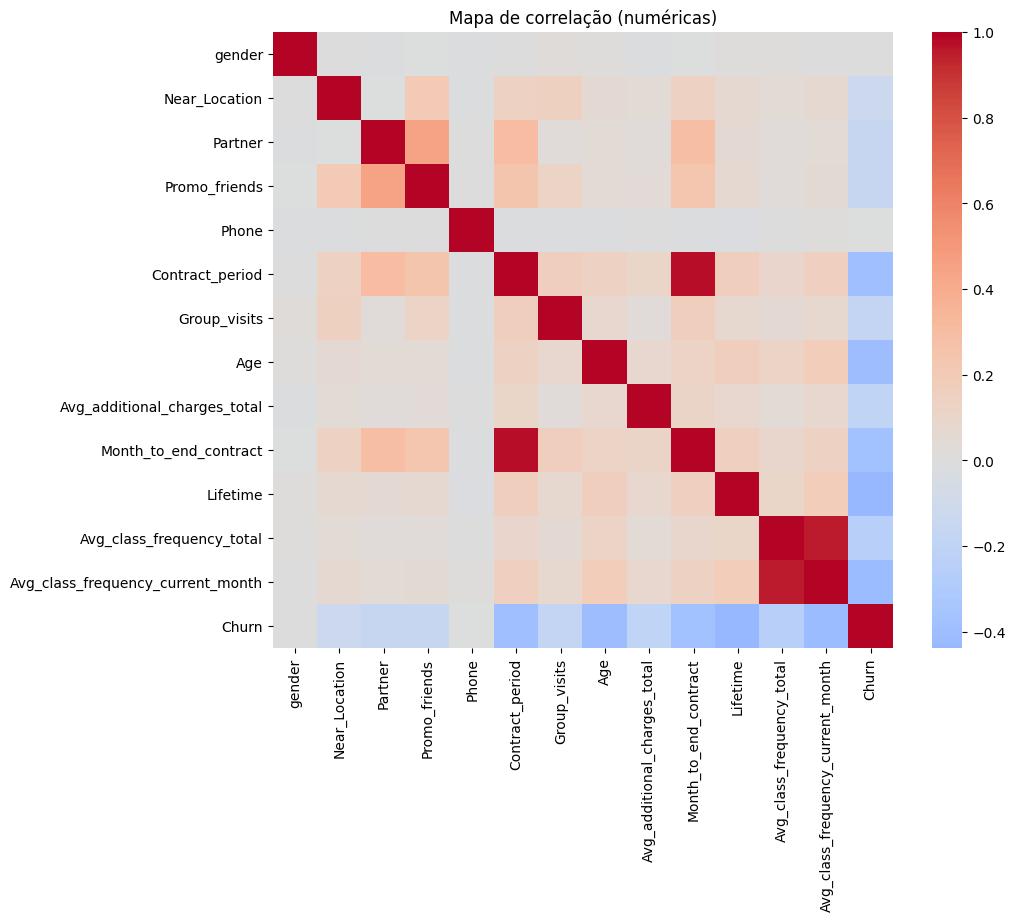

In [9]:
# Correlação
corr = df.corr()

# Top correlações com Churn
print("Correlações com Churn:")
display(corr['Churn'].sort_values(ascending=False))

# Heatmap (visual)
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title('Mapa de correlação (numéricas)')
plt.show()

#### Fatores que reduzem o chrun (forte correlação negativa)
- Alta frequência de aulas (geral e no mês atual)
- Maior tempo de casa (lifetime)
- Idade mais alta
- Contratos longos
- Meses restantes no contrato
      
#### Fatores com correlação moderada
- Morar perto
- Ter parceiro ou amigos
- Gastar com serviços adicionais
- Participar de aulas em grupo

#### Sem relação significativa
- Gênero
- Telefone informado

## Etapa 3 - Construção de modelo para predizer a rotatividade de clientes

In [10]:
# DataFrame com características transformadas
df_model = pd.get_dummies(df)
display(df_model.shape)

(4000, 14)

In [11]:
# dividindo os dados em características (a matriz X) e a variável objetivo (y)
y = df_model['Churn'].astype(int)
X = df_model.drop(columns=['Churn'])

# Dividindo os dados sobre treinos e testes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Padronizando colunas numéricas para modelos que precisam (logistic)
num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[num_features] = scaler.fit_transform(X_train[num_features])
X_test_scaled[num_features] = scaler.transform(X_test[num_features])

print("Shapes:", X_train.shape, X_test.shape)

Shapes: (3200, 13) (800, 13)


#### Regressão Logística:

In [12]:
# Regressão Logística
log = LogisticRegression(random_state=42, solver='liblinear', max_iter=1000)
log.fit(X_train_scaled, y_train)
y_pred_log = log.predict(X_test_scaled)
y_proba_log = log.predict_proba(X_test_scaled)[:,1]

print("--- Regressão Logística ---")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall (sensibilidade):", recall_score(y_test, y_pred_log))
print("Classification report:\n", classification_report(y_test, y_pred_log))

--- Regressão Logística ---
Accuracy: 0.92625
Precision: 0.8844221105527639
Recall (sensibilidade): 0.8301886792452831
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.86       212

    accuracy                           0.93       800
   macro avg       0.91      0.90      0.90       800
weighted avg       0.93      0.93      0.93       800



#### Randon Forest:

In [13]:
# Random Forest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:,1]

print("--- Random Forest ---")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall (sensibilidade):", recall_score(y_test, y_pred_rf))
print("Classification report:\n", classification_report(y_test, y_pred_rf))

# Importâncias das features para interpretar fatores que impactam churn
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print('Nível de impacto no churn:')
display(importances)

--- Random Forest ---
Accuracy: 0.92375
Precision: 0.8793969849246231
Recall (sensibilidade): 0.8254716981132075
Classification report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95       588
           1       0.88      0.83      0.85       212

    accuracy                           0.92       800
   macro avg       0.91      0.89      0.90       800
weighted avg       0.92      0.92      0.92       800

Nível de impacto no churn:


Lifetime                             0.275032
Avg_class_frequency_current_month    0.166255
Age                                  0.134066
Avg_class_frequency_total            0.133440
Avg_additional_charges_total         0.088897
Month_to_end_contract                0.069682
Contract_period                      0.064904
Group_visits                         0.017367
gender                               0.011729
Partner                              0.011255
Near_Location                        0.010571
Promo_friends                        0.010200
Phone                                0.006601
dtype: float64

#### Comparativo:

In [14]:
# Comparando as métricas
metrics = {
    'Accuracy': [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf)
    ],
    'Precision': [
        precision_score(y_test, y_pred_log),
        precision_score(y_test, y_pred_rf)
    ],
    'Recall (Sensibilidade)': [
        recall_score(y_test, y_pred_log),
        recall_score(y_test, y_pred_rf)
    ],
    'AUC': [
        roc_auc_score(y_test, y_proba_log),
        roc_auc_score(y_test, y_proba_rf)
    ]
}

# Criando DataFrame com índice nomeado
results_df = pd.DataFrame(metrics, index=['Regressão Logística', 'Random Forest']).round(3)

# Exibindo a tabela formatada
display(results_df.style.set_caption("Comparativo de Desempenho dos Modelos de Churn")
       .set_table_styles([{
           'selector': 'caption',
           'props': [('font-size', '16px'), ('font-weight', 'bold'), ('text-align', 'center')]
       }])
       .background_gradient(cmap='Blues', axis=None)
       .set_properties(**{'text-align': 'center', 'font-size': '13px'}))

,Accuracy,Precision,Recall (Sensibilidade),AUC
Regressão Logística,0.926000,0.884000,0.830000,0.977000
Random Forest,0.924000,0.879000,0.825000,0.968000


Os dois modelos tiveram desempenhos muito semelhantes, mas a Regressão Logísca trouxe melhores resultados nas métricas.

## Etapa 4 - Agrupamento de clientes

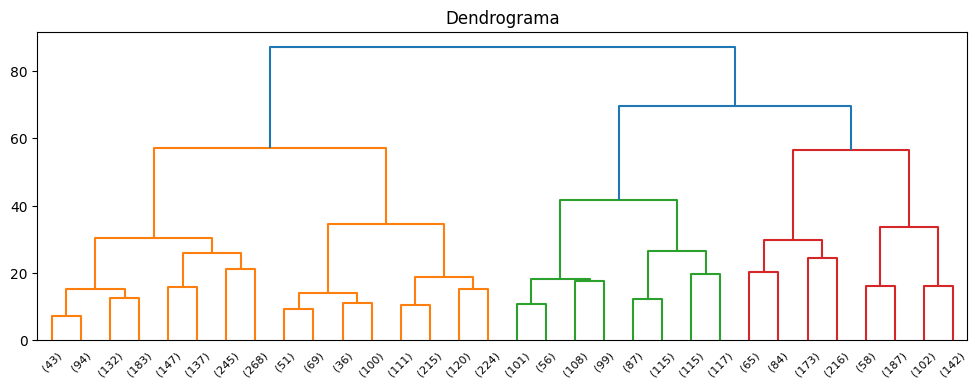

Tamanho por cluster:
0     344
1     663
2    1296
3     701
4     996
Name: cluster_k5, dtype: int64

Médias por cluster (features usadas + churn):


cluster_k5,0,1,2,3,4
Lifetime,12.683,3.811,1.921,2.803,3.569
Avg_class_frequency_total,2.000,1.617,1.219,1.621,3.052
Avg_class_frequency_current_month,2.007,1.603,0.945,1.508,3.045
Avg_additional_charges_total,148.217,167.226,88.034,255.559,133.211
Month_to_end_contract,4.715,11.063,1.909,2.284,4.276
Churn,0.000,0.036,0.586,0.280,0.082



Taxa de churn por cluster:


cluster_k5
2    0.586
3    0.280
4    0.082
1    0.036
0    0.000
Name: Churn, dtype: float64

In [15]:
# Clusterização
clust_cols = [c for c in ['Lifetime','Avg_class_frequency_total','Avg_class_frequency_current_month','Avg_additional_charges_total','Month_to_end_contract'] if c in df_model.columns]
clust_data = df_model[clust_cols].copy()
clust_data = clust_data.fillna(clust_data.median())

# Padronizando os dados
sc = StandardScaler()
clust_scaled = sc.fit_transform(clust_data)

# Dendrograma (truncado)
Z = linkage(clust_scaled, method='ward')
plt.figure(figsize=(12,4))
dendrogram(Z, truncate_mode='level', p=4)
plt.title('Dendrograma')
plt.show()

# KMeans com n=5
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
clusters = kmeans.fit_predict(clust_scaled)
df_model['cluster_k5'] = clusters

# Ver tamanhos e médias por cluster
print("Tamanho por cluster:")
print(df_model['cluster_k5'].value_counts().sort_index())

print("\nMédias por cluster (features usadas + churn):")
display(df_model.groupby('cluster_k5')[clust_cols + ['Churn']].mean().round(3).T)


print("\nTaxa de churn por cluster:")
display(df_model.groupby('cluster_k5')['Churn'].mean().sort_values(ascending=False).round(3))


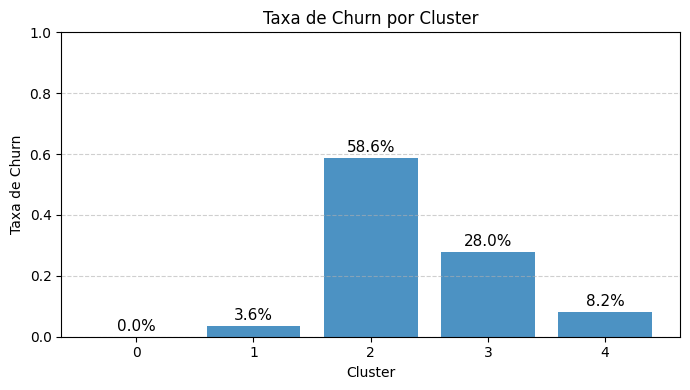

In [16]:
# Gráfico para visualização
churn_por_cluster = df_model.groupby('cluster_k5')['Churn'].mean().sort_values(ascending=False)

plt.figure(figsize=(7,4))
plt.bar(churn_por_cluster.index, churn_por_cluster.values, alpha=0.8)
plt.title('Taxa de Churn por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Taxa de Churn')
plt.ylim(0, 1)
plt.xticks(churn_por_cluster.index)
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Exibir valores percentuais no topo das barras
for i, taxa in enumerate(churn_por_cluster.values):
    plt.text(churn_por_cluster.index[i], taxa + 0.02, f"{taxa:.1%}", ha='center', fontsize=11)

plt.tight_layout()
plt.show()

Podemos perceber: 

- **Cluster 0** - Clientes fiéis de longo prazo
- **Cluster 1** - Clientes relativamente estáveis, contrato longo
- **Cluster 2** - Clientes de alto risco (churn)
- **Cluster 3** - Clientes moderados com gastos altos
- **Cluster 4** - Clientes engajados, baixo risco

Insights:
- Frequência de aulas e lifetime são indicadores-chave de churn.
- Cluster 2 deve ser o foco das ações de retenção, já que é o maior grupo de risco.
- Cluster 3, embora gaste mais, está em risco de churn, oportunidades de fidelização.
- Clusters 0, 1 e 4 mostram que clientes engajados ou de contratos longos têm baixo churn.

## Etapa 5 - Conclusões

### **Conclusões**

#### 1. Rotatividade geral (Churn): 
   Cerca de 26,5% dos clientes deixam a academia mensalmente.

#### 2. Fatores que mais influenciam a rotatividade:
Lifetime: quanto mais tempo de academia, menor a probabilidade de churn.  
Período de contrato: contratos longos (6 ou 12 meses) estão associados à maior fidelização.  
Frequência média de aulas: quanto mais o cliente treina, menor a chance de sair.  
Gastos adicionais: quem consome serviços extras tende a permanecer.  
Idade: clientes mais jovens têm maior risco de rotatividade.


### **Recomendações de Retenção e Interação**

#### 1. Programa de Engajamento para Novos Clientes (Cluster 2)
Objetivo: aumentar a frequência nas primeiras semanas e reduzir abandono precoce.  
Ações práticas:
- Oferecer treinamentos de boas-vindas e planos personalizados.  
- Enviar notificações e lembretes motivacionais.  
- Criar um bônus por frequência: brinde ou desconto após 10 treinos no primeiro mês.  

#### 2. Estratégias de Fidelização e Contratos Longos
Objetivo: incentivar clientes a firmar contratos de 6 ou 12 meses.  
Ações práticas:
- Oferecer descontos progressivos ou benefícios exclusivos (ex: aula com personal 1x/mês).  
- Implementar campanhas de upgrade de plano com vantagens antecipadas.  
- Destacar histórias de sucesso de membros de longo prazo (marketing social positivo).  

#### 3. Reativação de Clientes Inativos
Objetivo: reconquistar clientes que reduziram sua frequência de treino.  
Ações práticas:
- Monitorar quedas de frequência e acionar alertas automáticos.  
- Enviar convites personalizados para eventos, desafios ou novas modalidades.  
- Oferecer promoções de retorno (“volte essa semana e ganhe 1 aula em grupo”).  

#### 4. Engajamento Social e Comunitário
Objetivo: fortalecer o senso de pertencimento à academia.  
Ações práticas:
- Expandir o programa “Traga um amigo” com recompensas duplas.  
- Organizar eventos e desafios coletivos mensais.  
- Promover grupos de treino e instrutores mais populares no app e redes sociais.  

### **Resumo**

| Cluster | Descrição resumida | Churn médio | Perfil principal |
| -------- | ------------------ | ------------ | ---------------- |
| **0** | Clientes antigos e frequentes, contratos longos | **0%** | Fiéis |
| **1** | Boa frequência e contratos longos | **3,6%** | Engajados e estáveis |
| **2** | Novos clientes, baixa frequência e contratos curtos | **58,6%** | **Alto risco de churn** |
| **3** | Baixa frequência, mas gastam mais em extras | **28%** | Retenção possível |
| **4** | Boa frequência e gasto médio | **8,2%** | Leais, mas atentos |

| Foco | Estratégia | Ação sugerida |
|-----|------------|--------------|
| **Cluster 2 (alto risco)** | Engajamento inicial | Programa de acompanhamento e bonificações por frequência |
| **Clusters 1 e 4 (fiéis)** | Fidelização | Contratos longos e benefícios exclusivos |
| **Cluster 3 (moderado)** | Retenção | Reativar por meio de experiências e serviços premium |
| **Cluster 0 (leais)** | Manutenção | Recompensas simbólicas e eventos de reconhecimento |


A retenção da Model Fitness depende de **estimular o engajamento logo no início**, **incentivar contratos longos** e **reforçar o vínculo social** entre os membros.  
O uso contínuo de análises de churn permitirá ajustar ações preventivas e personalizadas, garantindo maior fidelização no médio e longo prazo.